- Nishant Mahajan 
- Siddharth Singh 756590

# SIMPSON CHARACTER PREDICTION


## CONVOLUTIONAL NEURAL NETWORKS

The ability to use artificial intelligence to identify objects and classify images has been one of the fastest growing areas in AI. The goal is to predict the names of the Simpson characters which were there in the show. 

**Why Are We Here?**

So, basically we are planning to build some models which will predict the names of the differnt characters learning from their faces. Now this algorithm can be used on various platforms like facebook as auto-tag feature or in any app which lets you upload an image and show similar results like a clothing brand's app like H&M or ZARA, suppose you have an image of a trench coat and you want the same coat or similar, so you will upload the image and the app will show the best results.

**The Road Ahead:** We break the notebook into separate steps.

Step 1: Import Datasets 

Step 2: Detect And Visualize Characters

Step 3: Opencv 

Step 4: Data Augmentation

In [1]:
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
import pandas as pd
import keras 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization,Conv2D,MaxPooling2D,AveragePooling2D,MaxPool2D
from keras.regularizers import l2
import ipyplot
import cv2                
%matplotlib inline            
from tqdm import tqdm
import tensorflow as tf
import os
from keras.optimizers import RMSprop, SGD, Adam, Adagrad
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
import math
from keras.models import Model
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.optimizers import RMSprop
plt.rcParams['figure.figsize'] = (16,10)     # set figure size
from sklearn.utils import shuffle     
from os import listdir
from os.path import isfile, join
import re
from keras.preprocessing import image
from keras.models import load_model

# Step 1
## Import Dataset


In the code cell below, we import a dataset of simpson characters.

In [2]:
img_dir = ('C:\\access\\data analytics\\Sem4\\Capstone\\simpsons')
os.listdir(img_dir)

['test', 'train', 'valid', 'vgg.h5']

In [3]:
test_path = img_dir+'\\test\\'
train_path = img_dir+'\\train\\'
valid_path = img_dir+'\\valid\\'

In [4]:
class_names = ['abraham_grampa_simpson', 'apu_nahasapeemapetilon', 'bart_simpson', 'black widow'
               , 'captain america', 'charles_montgomery_burns','chief_wiggum','comic_book_guy','edna_krabappel'
               , 'homer_simpson', 'hulk', 'kent_brockman', 'krusty_the_clown', 'lenny_leonard', 'lisa_simpson'
               , 'marge_simpson', 'mayor_quimby', 'milhouse_van_houten', 'moe_szyslak', 'ned_flanders'
               , 'nelson_muntz', 'principal_skinner', 'sideshow_bob', 'spider-man', 'thanos']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)
IMAGE_SIZE = (32,32)

In [5]:
def load_data():
    """
        Load the data:
            - 21000 images to train the network.
            - 1200 images to evaluate how accurately the network learned to classify images.
    """
    
    datasets = ['C:\\access\\data analytics\Sem4\Capstone\simpsons\\train', 'C:\\access\\data analytics\Sem4\Capstone\simpsons\\test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
         
        
        output.append((images, labels))

    return output

In [6]:
(train_images, train_labels), (test_images, test_labels) = load_data()

  2%|▏         | 18/913 [00:00<00:04, 180.00it/s]

Loading C:\access\data analytics\Sem4\Capstone\simpsons\train


  0%|          | 0/50 [00:00<?, ?it/s]

Loading C:\access\data analytics\Sem4\Capstone\simpsons\test


100%|██████████| 55/55 [00:00<00:00, 65.47it/s]


In [7]:
train_images, train_labels = shuffle(train_images, train_labels)

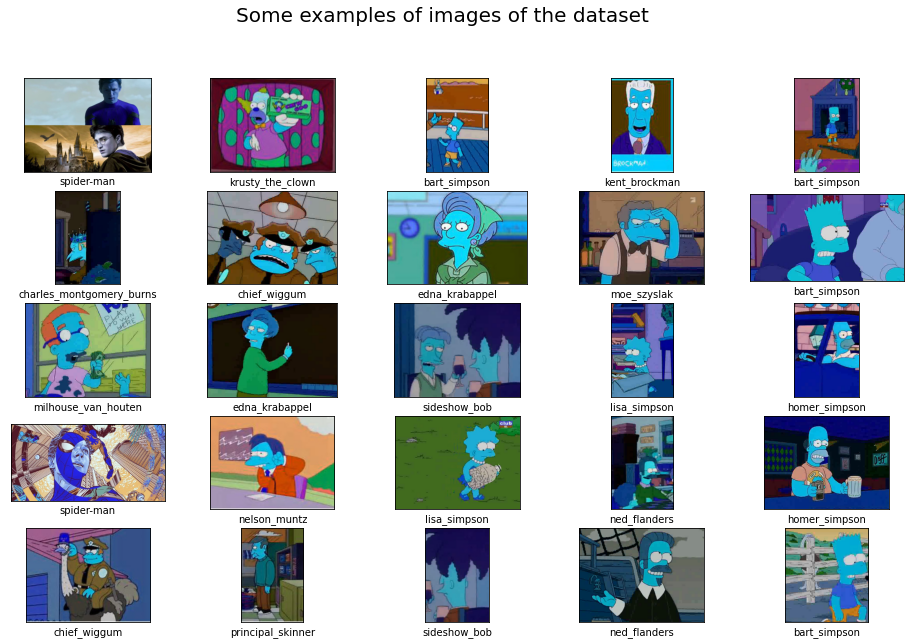

In [48]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(16,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=20)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i])
        plt.xlabel(class_names[labels[i]])
    plt.show()
    
display_examples(class_names, train_images, train_labels)

# Step 2

## Visualization

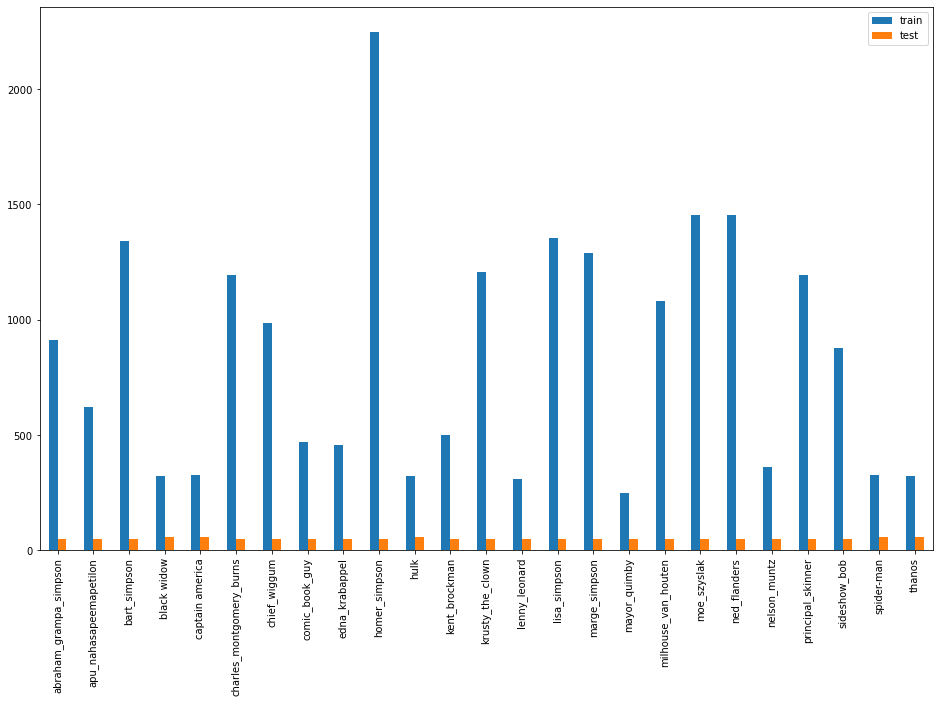

In [28]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=class_names
            ).plot.bar()
plt.show()

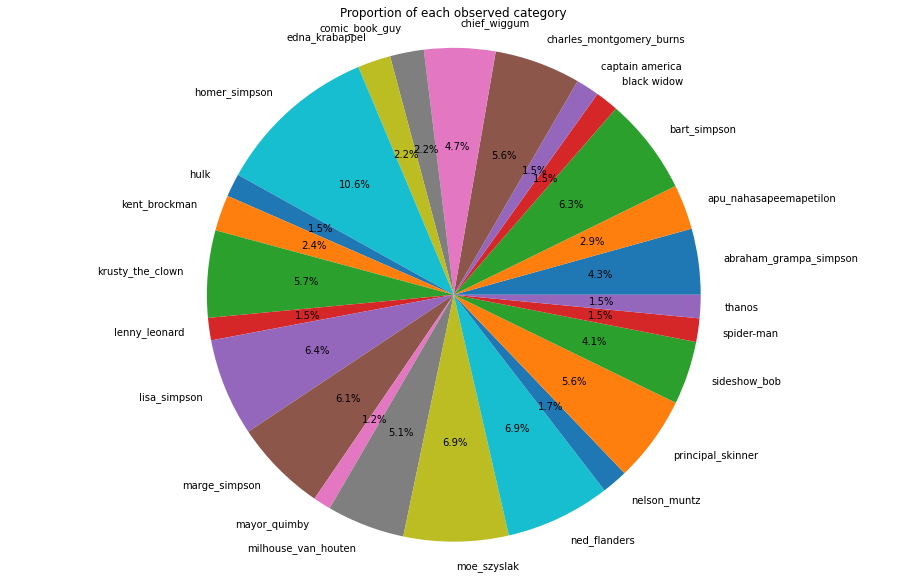

In [29]:
plt.pie(train_counts,explode=(0, 0, 0, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0) , labels=class_names,autopct='%1.1f%%')
plt.axis('equal'),
plt.title('Proportion of each observed category')
plt.show()

# Step 3 
# Reading Data

In [6]:
os.listdir(train_path+'abraham_grampa_simpson')[0]

'pic_0000.jpg'

In [7]:
img_0 = train_path+'abraham_grampa_simpson\\'+'pic_0001.jpg'
img_0

'E:\\Clair\\SEM4\\Project\\simpsons\\train\\abraham_grampa_simpson\\pic_0001.jpg'

In [8]:
imread(img_0)

array([[[ 77,  51,  98],
        [ 77,  51,  98],
        [ 77,  51,  98],
        ...,
        [115,  52,  69],
        [117,  53,  70],
        [116,  52,  69]],

       [[ 87,  61, 108],
        [ 87,  61, 108],
        [ 87,  61, 108],
        ...,
        [129,  66,  83],
        [129,  66,  83],
        [129,  66,  83]],

       [[ 98,  72, 119],
        [ 98,  72, 119],
        [ 98,  72, 119],
        ...,
        [140,  77,  94],
        [140,  77,  94],
        [140,  77,  94]],

       ...,

       [[ 73,  80, 152],
        [ 73,  80, 152],
        [ 73,  80, 152],
        ...,
        [167, 168, 160],
        [167, 168, 160],
        [167, 168, 160]],

       [[ 73,  80, 152],
        [ 73,  80, 152],
        [ 73,  80, 152],
        ...,
        [161, 158, 149],
        [161, 158, 149],
        [161, 158, 149]],

       [[ 73,  80, 152],
        [ 73,  80, 152],
        [ 73,  80, 152],
        ...,
        [154, 150, 141],
        [154, 150, 141],
        [154, 150, 141]]

In [9]:
imread(img_0).shape

(368, 496, 3)

### Cartoon

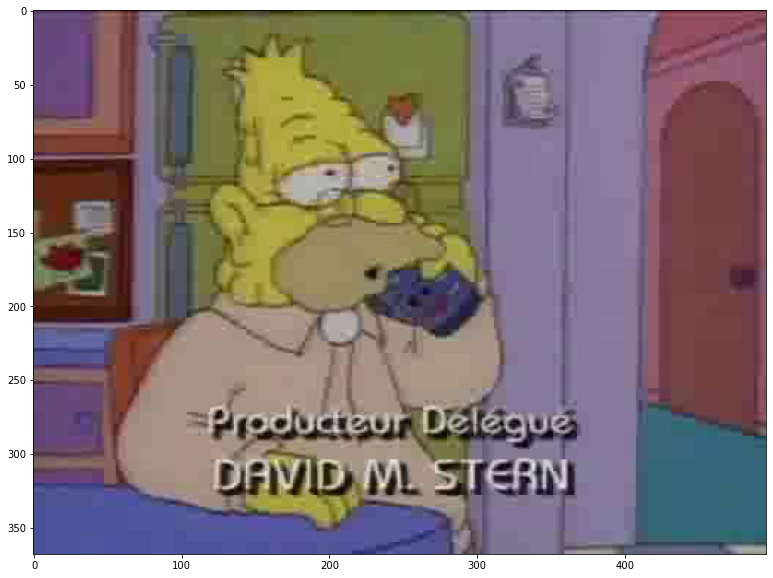

In [10]:
plt.imshow(imread(img_0))

In [11]:
os.listdir(train_path+'hulk')[0]

'pic_001.jpg'

In [12]:
img_1 = train_path+'hulk\\'+'pic_001.jpg'
img_1

'E:\\Clair\\SEM4\\Project\\simpsons\\train\\hulk\\pic_001.jpg'

In [13]:
imread(img_1)

array([[[ 23,  24,  29],
        [ 23,  24,  29],
        [ 23,  24,  29],
        ...,
        [127, 133, 105],
        [128, 134, 106],
        [129, 135, 107]],

       [[ 28,  29,  34],
        [ 28,  29,  34],
        [ 28,  29,  34],
        ...,
        [127, 133, 105],
        [128, 134, 106],
        [128, 134, 106]],

       [[ 25,  26,  31],
        [ 25,  26,  31],
        [ 25,  26,  31],
        ...,
        [127, 133, 105],
        [128, 134, 106],
        [128, 134, 106]],

       ...,

       [[ 47,  40,  32],
        [ 47,  40,  34],
        [ 47,  40,  34],
        ...,
        [  8,   8,   6],
        [  8,   8,   6],
        [  8,   8,   6]],

       [[ 46,  39,  31],
        [ 46,  39,  33],
        [ 46,  39,  33],
        ...,
        [  8,   8,   6],
        [  8,   8,   6],
        [  8,   8,   6]],

       [[ 40,  36,  27],
        [ 42,  38,  29],
        [ 43,  38,  32],
        ...,
        [  7,   7,   5],
        [  9,   9,   7],
        [ 11,  11,   9]]

In [14]:
imread(img_1).shape

(625, 1024, 3)

### Human

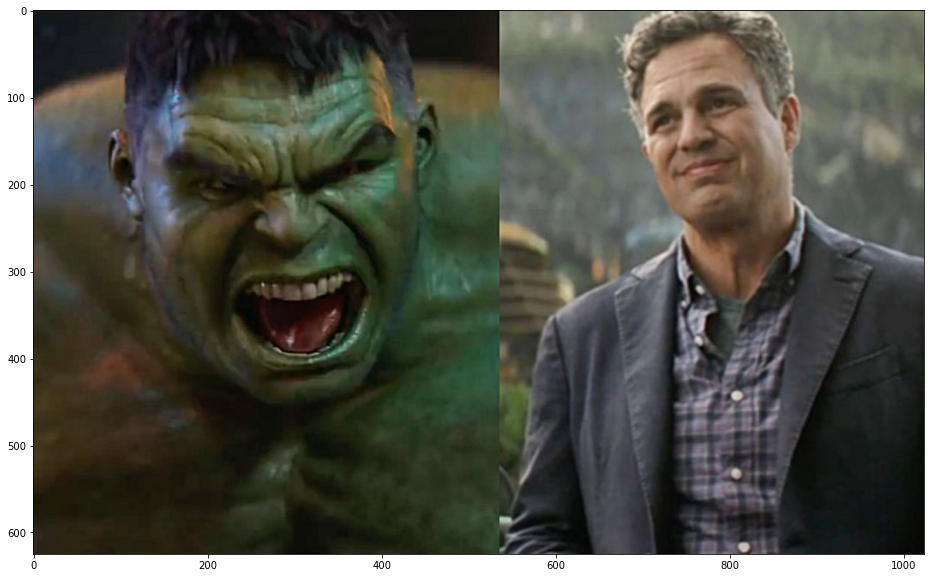

In [15]:
plt.imshow(imread(img_1))

# Step 4
# OpenCV Face Recognition

Computer vision is a field of study which encompasses on how computer see and understand digital images and videos.
Computer vision involves seeing or sensing a visual stimulus, make sense of what it has seen and also extract complex information that could be used for other machine learning activities.

**Haarcascade_frontalface_alt2.xml**

It is a machine learning-based approach where a cascade function is trained from a lot of positive and negative images. It is then used to detect objects in other images.

Number of faces detected: 1


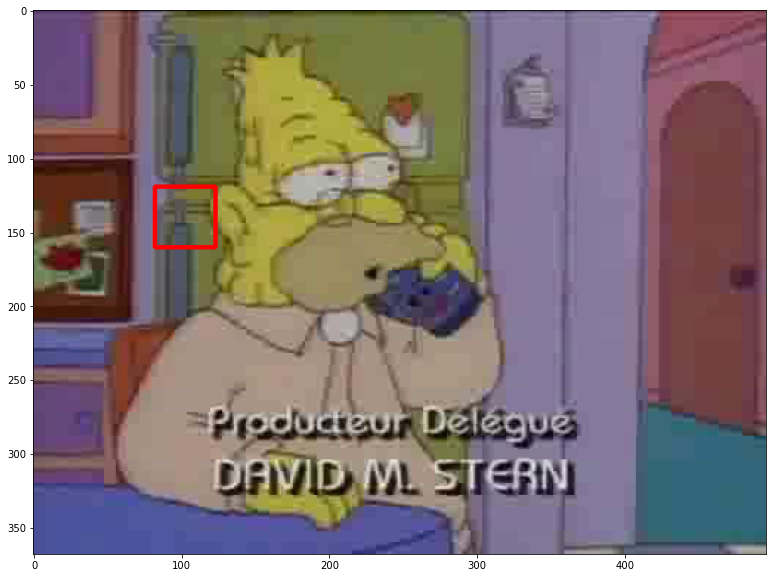

In [16]:
face_cascade = cv2.CascadeClassifier('E:\\Softwares\\Ana\\envs\\keras\\Library\\etc\\haarcascades\\haarcascade_frontalface_alt2.xml')
img = cv2.imread(img_0)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray,1.05,2)
print('Number of faces detected:', len(faces))

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
    
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(cv_rgb)
plt.show()

Number of faces detected: 2


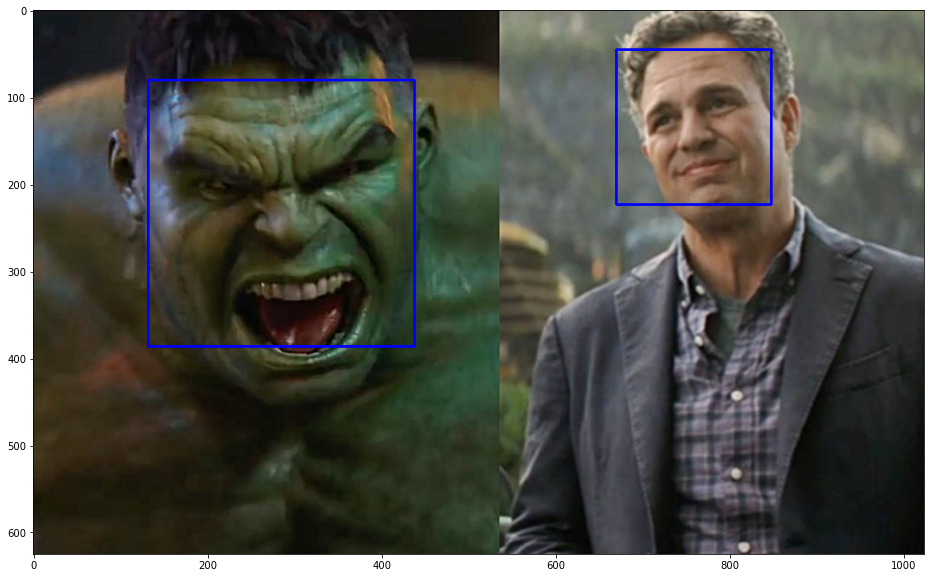

In [17]:
face_cascade = cv2.CascadeClassifier('E:\\Softwares\\Ana\\envs\\keras\\Library\\etc\\haarcascades\\haarcascade_frontalface_alt2.xml')
img = cv2.imread(img_1)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray,1.05,5)
print('Number of faces detected:', len(faces))

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(cv_rgb)
plt.show()

### I tried to run OpenCV several times on Simpson character and the result shown was not as thought because it was not detecting faces accurately. We came to know that haarcascade_classfier are meant for faces of humans not creatures or cartoons whose faces are not alike humans.

Now we will not be using OpenCV for image preprocessing and will continue with Keras preprocessing.

# Step 5

## Data Augmentation

### ImageDataGenerator
    
    tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode="nearest",
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None,
)


**Explanation of each hyperparameter is present on the official site of Keras**

https://keras.io/api/preprocessing/image/


### Image Rotation

In [18]:
train_datagen = ImageDataGenerator(rescale=1/255.,rotation_range=50)
train_aug = train_datagen.flow_from_directory(train_path, target_size=(148,148), batch_size=16,
                                                    class_mode='categorical', shuffle=True)

Found 21162 images belonging to 25 classes.



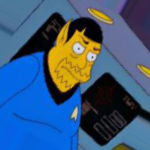
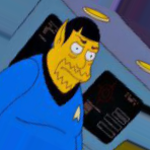
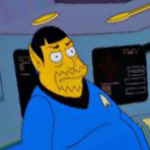
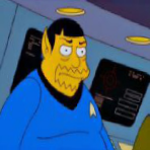
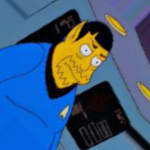


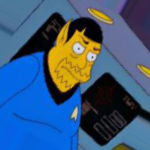
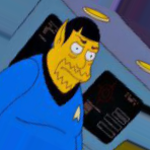
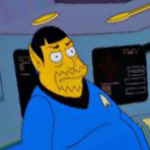
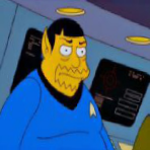
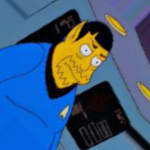

In [19]:
aug_images = [train_aug[0][0][0] for i in range(5)]
ipyplot.plot_images(aug_images)

##### Here we are viewing the same image if we give rotation_range argument as 50. This changes the image by 50 degree of angle while training the model.


### Image Width and Height shift


In [20]:
image_aug = ImageDataGenerator(rescale=1/255.,width_shift_range=0.2, height_shift_range=0.2)

train_aug = image_aug.flow_from_directory(train_path, target_size=(148, 148),batch_size=1,
                                                    class_mode='binary', shuffle=True)

Found 21162 images belonging to 25 classes.



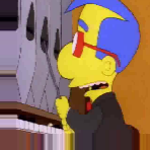
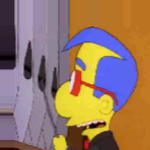
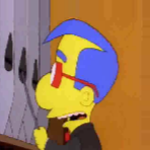
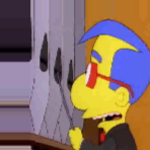
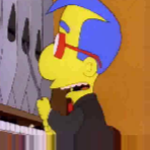


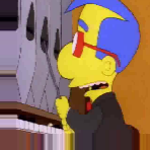
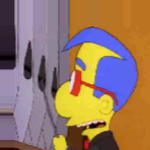
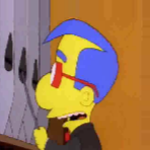
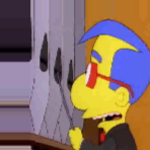
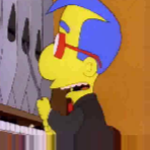

In [21]:
aug_images = [train_aug[0][0][0] for i in range(5)]
ipyplot.plot_images(aug_images)

##### Here we are performing height and width shift, this try to shift the pixels of the image to the center. The float is the percentage of the shift.


### Image Zooming


In [22]:
image_aug = ImageDataGenerator(rescale=1./255,zoom_range=0.5)

train_aug = image_aug.flow_from_directory(train_path,target_size=(148, 148),batch_size=1,
                                                    class_mode='binary', shuffle=True)

Found 21162 images belonging to 25 classes.



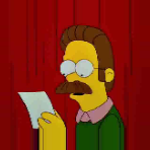
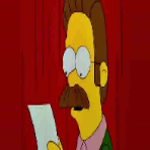
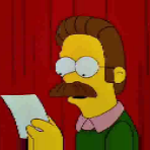
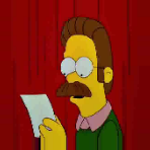
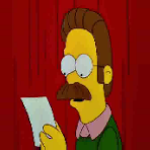


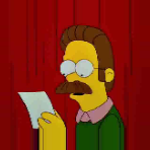
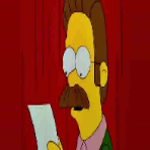
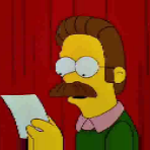
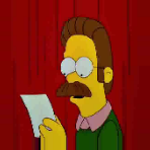
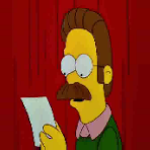

In [23]:
aug_images = [train_aug[0][0][0] for i in range(5)]
ipyplot.plot_images(aug_images)

##### Here we are trying to change the zoom of the image by 50% range. This gives us the same image in diffent zooming views.


In [24]:
image_aug = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_aug = image_aug.flow_from_directory(train_path,target_size=(148, 148),batch_size=1,
                                                    class_mode='binary', shuffle=True)

Found 21162 images belonging to 25 classes.



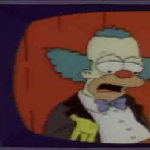
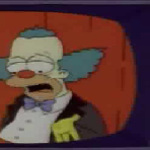
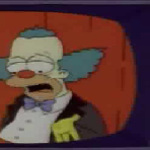
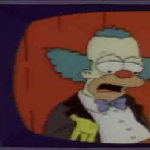
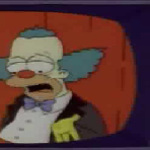


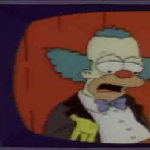
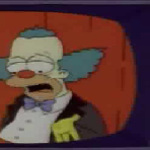
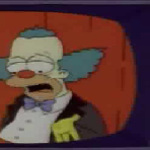
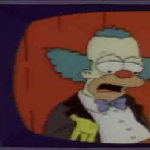
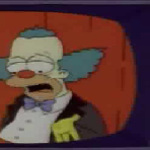

In [25]:
aug_images = [train_aug[0][0][0] for i in range(5)]
ipyplot.plot_images(aug_images)

##### Here are we are flipping the same image horizontally, so that the model sees the image in defferent perspectives.


### Image Vertical Flip

Found 21162 images belonging to 25 classes.



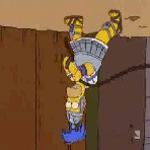
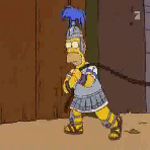
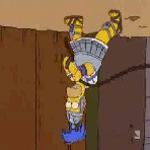
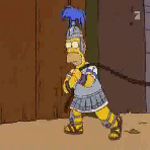
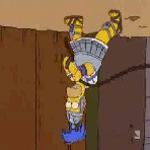


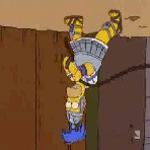
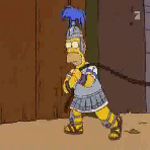
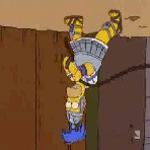
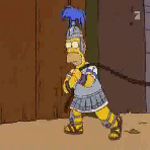
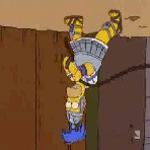

In [26]:
image_aug = ImageDataGenerator(rescale=1/255.,vertical_flip=True)

train_aug = image_aug.flow_from_directory(train_path,target_size=(148, 148),batch_size=1,
                                                    class_mode='binary', shuffle=True)
aug_images = [train_aug[1][0][0] for i in range(5)]
ipyplot.plot_images(aug_images)

##### Here we are trying to flip the same image vertically, so that the model learn the image in different perspectives.


### Image Fill mode¶


Found 21162 images belonging to 25 classes.



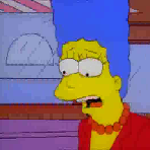
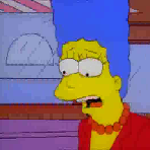
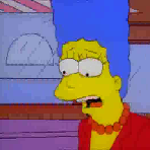
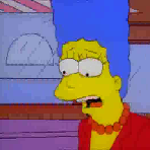
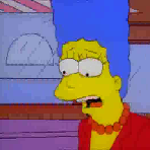


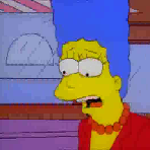
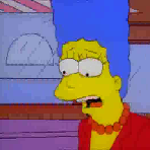
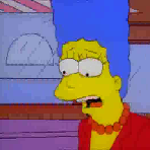
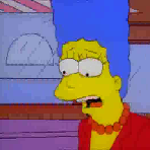
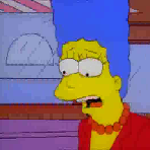

In [27]:
image_aug = ImageDataGenerator(rescale=1/255.,fill_mode='nearest')

train_aug = image_aug.flow_from_directory(train_path,target_size=(148, 148),batch_size=8,
                                                    class_mode='binary', shuffle=True)
aug_images = [train_aug[0][0][0] for i in range(5)]
ipyplot.plot_images(aug_images)

##### When you rotate the image there is a chance where pixels move outside the image, this creates empty space. To remove this we will fill it with the pixels near to that space. This is done by giving fill argument 'nearest'.


### Image Brightness

Found 21162 images belonging to 25 classes.



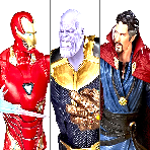
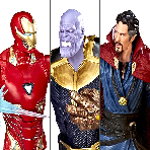
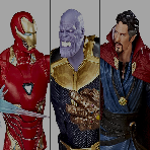
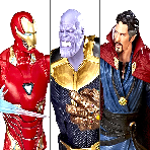
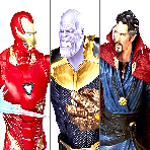


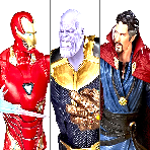
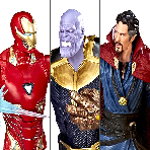
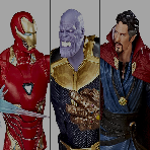
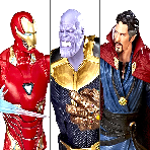
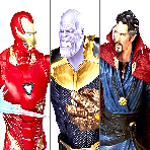

In [28]:
image_aug = ImageDataGenerator(rescale=1/255.,brightness_range=[0.5,2])

train_aug = image_aug.flow_from_directory(train_path,target_size=(148, 148),batch_size=1,
                                                    class_mode='binary', shuffle=True)
aug_images = [train_aug[0][0][0] for i in range(5)]
ipyplot.plot_images(aug_images)

##### Here we are trying to change the brightness of the same image in the range of 0.5 & 2. This creates different images of the same images with different brightness range.

In [6]:
train_datagen_aug = ImageDataGenerator(rotation_range=30,width_shift_range=.3,height_shift_range=.3
                                       ,horizontal_flip=True
                                       ,  rescale=1./255, fill_mode='nearest')
valid_datagen_aug = ImageDataGenerator( rescale=1./255)
test_datagen_aug = ImageDataGenerator( rescale=1./255)

train_generator_aug = train_datagen_aug.flow_from_directory(train_path,target_size=(32, 32)
                                                        ,batch_size=16,class_mode='categorical'
                                                        )

validation_generator_aug = valid_datagen_aug.flow_from_directory(valid_path,target_size=(32, 32)
                                                           ,batch_size=16,class_mode='categorical'
                                                           )

test_generator_aug = test_datagen_aug.flow_from_directory(test_path,target_size=(32,32)
                                                      ,batch_size=16,class_mode='categorical'
                                                      ,shuffle=False )

Found 21162 images belonging to 25 classes.
Found 1270 images belonging to 25 classes.
Found 1270 images belonging to 25 classes.


# Step 6
# LeNet-5

In [ ]:
# Instantiate an empty sequential model
model = Sequential()
# C1 Convolutional Layer
model.add(Conv2D(filters = 6, kernel_size = 5, strides = 1, activation = 'tanh', input_shape = (32,32,3), padding = 'same'))
  
# S2 Pooling Layer
model.add(AveragePooling2D(pool_size = 2, strides = 2, padding = 'valid'))
  
# C3 Convolutional Layer
model.add(Conv2D(filters = 16, kernel_size = 5, strides = 1,activation = 'tanh', padding = 'valid'))

# S4 Pooling Layer
model.add(AveragePooling2D(pool_size = 2, strides = 2, padding = 'valid'))
  
# C5 Convolutional Layer
model.add(Conv2D(filters = 120, kernel_size = 5, strides = 1,activation = 'tanh', padding = 'valid'))
  
# Flatten the CNN output to feed it with fully connected layers
model.add(Flatten())
  
# FC6 Fully Connected Layer
model.add(Dense(units = 84, activation = 'tanh'))
  
# FC7 Output layer with softmax activation
model.add(Dense(units = 25, activation = 'softmax'))
  
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# set the learning rate schedule as created in the original paper
def lr_schedule(epoch):
    if epoch <= 2:     
        lr = 5e-4
    elif epoch > 2 and epoch <= 5:
        lr = 2e-4
    elif epoch > 5 and epoch <= 9:
        lr = 5e-5
    else: 
        lr = 1e-5
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

# train the model
hist = model.fit_generator(train_generator_aug,steps_per_epoch = len(train_generator_aug),
                             epochs = 20,
                             validation_data = validation_generator_aug,
                             validation_steps = len(validation_generator_aug), callbacks=[lr_scheduler])

# AlexNet

In [28]:
model = Sequential()
# 1st layer (conv + pool + batchnorm)
model.add(Conv2D(filters= 96, kernel_size= (11,11), strides=(4,4), padding='valid', input_shape = (32,32,3)))
model.add(Activation('relu')) # activation function can be added on its own layer or within the Conv2D function as we did in previous implementations
model.add(MaxPool2D(strides=(2,2)))
model.add(BatchNormalization())

# 2nd layer (conv + pool + batchnorm)
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same', kernel_regularizer=l2(0.0005)))
model.add(Activation('relu'))
model.add(MaxPool2D(strides=(1,1)))
model.add(BatchNormalization())

# layer 3 (conv + batchnorm) <--- note that the authors did not add a POOL layer here
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', kernel_regularizer=l2(0.0005)))
model.add(Activation('relu'))
model.add(BatchNormalization())

# layer 4 (conv + batchnorm) <--- similar to layer 4
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', kernel_regularizer=l2(0.0005)))
model.add(Activation('relu'))
model.add(BatchNormalization())

# layer 5 (conv + batchnorm)
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', kernel_regularizer=l2(0.0005)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
# Flatten the CNN output to feed it with fully connected layers
model.add(Flatten())
# layer 6 (Dense layer + dropout)
model.add(Dense(units = 4096, activation = 'relu'))
model.add(Dropout(0.5))
# layer 7 (Dense layers)
model.add(Dense(units = 4096, activation = 'relu'))
model.add(Dropout(0.5))

# layer 8 (softmax output layer)
model.add(Dense(units = 25, activation = 'softmax'))
# print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 6, 6, 96)          34944     
_________________________________________________________________
activation_1 (Activation)    (None, 6, 6, 96)          0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 96)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3, 3, 96)          384       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 256)         614656    
_________________________________________________________________
activation_2 (Activation)    (None, 3, 3, 256)         0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 256)        

In [29]:
# reduce learning rate by 0.1 when the validation error plateaus
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1))
# set the SGD optimizer with lr of 0.01 and momentum of 0.9
optimizer = keras.optimizers.sgd(lr = 0.01, momentum = 0.9)

# compile the model
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# train the model
# call the reduce_lr value using callbacks in the training method
history = model.fit_generator(train_generator_aug,steps_per_epoch = len(train_generator_aug), epochs=50,
                              validation_data=validation_generator_aug, callbacks=[reduce_lr])

Epoch 1/50
1323/1323 [==============================] - 673s 509ms/step - loss: 3.5322 - accuracy: 0.1337 - val_loss: 3.1650 - val_accuracy: 0.1457
Epoch 2/50
1323/1323 [==============================] - 476s 360ms/step - loss: 3.1803 - accuracy: 0.1884 - val_loss: 2.5998 - val_accuracy: 0.1669
Epoch 3/50
1323/1323 [==============================] - 480s 363ms/step - loss: 2.9566 - accuracy: 0.2291 - val_loss: 3.5613 - val_accuracy: 0.2236
Epoch 4/50
1323/1323 [==============================] - 480s 363ms/step - loss: 2.7640 - accuracy: 0.2781 - val_loss: 2.2673 - val_accuracy: 0.2496
Epoch 5/50
1323/1323 [==============================] - 479s 362ms/step - loss: 2.6264 - accuracy: 0.3107 - val_loss: 2.4759 - val_accuracy: 0.3008
Epoch 6/50
1323/1323 [==============================] - 478s 362ms/step - loss: 2.5001 - accuracy: 0.3462 - val_loss: 2.5901 - val_accuracy: 0.3551
Epoch 7/50
1323/1323 [==============================] - 488s 369ms/step - loss: 2.4060 - accuracy: 0.3710 - val_

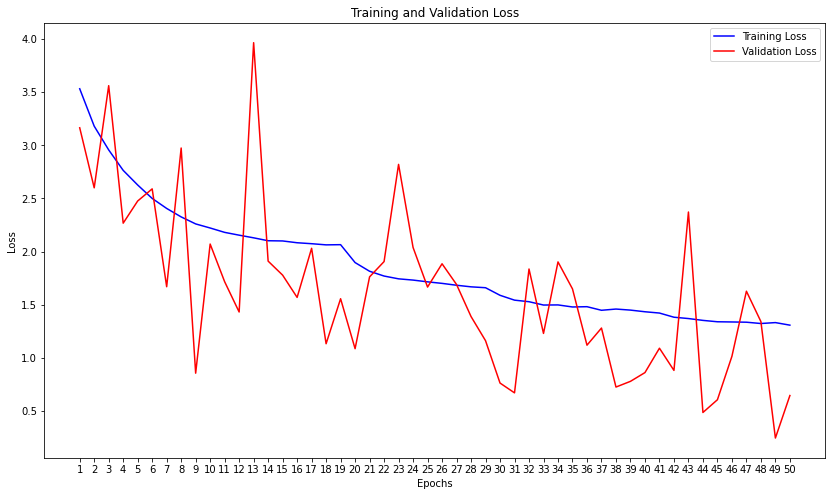

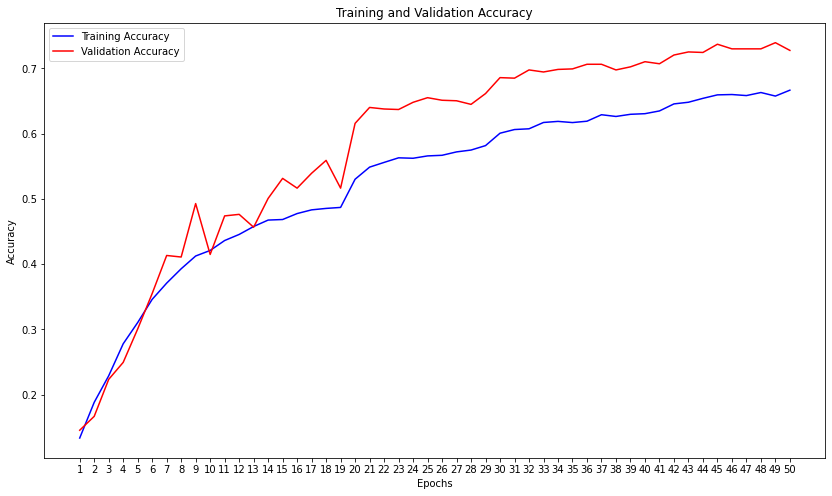

In [39]:
history_dict = history.history

loss_values = history_dict['loss']  
val_loss_values = history_dict['val_loss']
plt.figure(figsize=(14,8))

#Plotting loss & accuracy of training and validation datasets
epochs = range(1, len(loss_values)+1) 
# code to plot the results
plt.plot(epochs, loss_values, 'b', label="Training Loss")
plt.plot(epochs, val_loss_values, 'r', label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Loss")
plt.legend()
plt.show()


history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.figure(figsize=(14,8))

plt.plot(epochs, acc_values, 'b', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [67]:
class_labels = test_generator_aug.class_indices
class_labels = {v:k for k,v in class_labels.items()}
classes = list(class_labels.values())
y_pred = model.predict_generator(test_generator_aug, len(test_generator_aug))
y_pred = np.argmax(y_pred,axis=1)
cnf_matrix = confusion_matrix(test_generator_aug.classes,y_pred)
print(cnf_matrix)

[[35  0  0  0  0  2  0  0  0  4  0  2  0  0  0  0  0  1  1  3  0  0  0  0
   0]
 [ 0 48  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  1  0  0  0  0  0  0
   0]
 [ 0  0 23  0  0  2  1  0  0  2  0  1  0  0 14  0  2  0  1  1  2  1  0  0
   0]
 [ 0  1  0  9 14  0  1  0  0  0  9  0  1  0  0  0  0  0  0  1  0  1  0  3
  15]
 [ 0  1  0 11 22  0  0  0  0  0  7  0  0  0  0  0  0  0  1  0  0  0  0  3
  12]
 [ 0  0  0  0  0 38  3  0  0  2  0  1  3  0  0  0  0  0  1  0  0  0  0  0
   0]
 [ 0  0  0  0  1  0 46  0  0  0  0  0  0  0  0  1  0  1  0  0  0  0  0  1
   0]
 [ 4  0  0  0  0  1  2 30  0  0  1  0  2  0  0  0  0  0  7  0  1  1  0  0
   0]
 [ 2  0  0  0  0  2  1  0 39  0  0  0  0  0  1  1  0  0  0  4  0  0  0  0
   0]
 [ 0  0  1  0  0  2  0  0  0 40  0  0  0  0  0  1  0  2  2  1  1  0  0  0
   0]
 [ 1  0  0  4  5  1  0  0  0  0 30  0  3  0  0  0  0  0  0  0  0  0  2  3
   7]
 [ 0  0  0  0  0  0  0  0  0  0  0 44  0  0  1  1  0  1  0  0  0  0  3  0
   0]
 [ 0  0  0  0  0  0  0  0  0  2  0  0 47

                          precision    recall  f1-score   support

  abraham_grampa_simpson       0.81      0.73      0.77        48
  apu_nahasapeemapetilon       0.91      0.96      0.93        50
            bart_simpson       0.74      0.46      0.57        50
             black widow       0.26      0.16      0.20        55
         captain america       0.42      0.39      0.40        57
charles_montgomery_burns       0.70      0.79      0.75        48
            chief_wiggum       0.75      0.92      0.83        50
          comic_book_guy       0.94      0.61      0.74        49
          edna_krabappel       1.00      0.78      0.88        50
           homer_simpson       0.62      0.80      0.70        50
                    hulk       0.55      0.54      0.54        56
           kent_brockman       0.83      0.88      0.85        50
        krusty_the_clown       0.76      0.94      0.84        50
           lenny_leonard       0.89      0.66      0.76        50
         

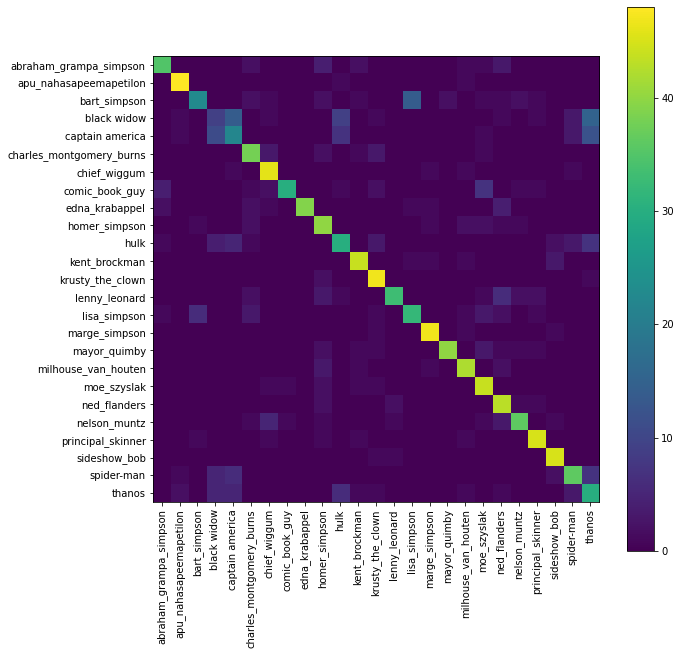

In [68]:
target_names = list(class_labels.values())
print(classification_report(test_generator_aug.classes,y_pred,target_names=target_names))
plt.figure(figsize=(10,10))
plt.imshow(cnf_matrix, interpolation= 'nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks,classes, rotation=90)
_ = plt.yticks(tick_marks,classes)

# VGG-16

In [7]:
model = Sequential()
# First ReLu Layer
model.add(Conv2D(64,(3,3),padding='same',input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
# Second Conv-Relu Layer
model.add(Conv2D(64,(3,3),padding='same',input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
# Max Pooling With Dropout
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
# Third Relu Layer
model.add(Conv2D(128,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
# Fourth Relu Layer
model.add(Conv2D(128,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
# Max Pooling With Dropout
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
# Fifth Relu Layer
model.add(Conv2D(256,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
# Sixth Relu Layer
model.add(Conv2D(256,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
# Max Pooling with Dropout
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))
# First set of fully connected layers
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
# Second set of fully connected layers
model.add(Dense(256))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
# Final Dense layer
model.add(Dense(25))
model.add(Activation('softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
activation (Activation)      (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0

In [8]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(lr=.01), metrics = ['accuracy'])


history = model.fit_generator(train_generator_aug,
                             steps_per_epoch = len(train_generator_aug),
                             epochs = 20,
                             validation_data = validation_generator_aug,
                             validation_steps = len(validation_generator_aug))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
1323/1323 [==============================] - 195s 148ms/step - loss: 2.9302 - accuracy: 0.1608 - val_loss: 2.8402 - val_accuracy: 0.1858
Epoch 2/20
1323/1323 [==============================] - 202s 153ms/step - loss: 2.3534 - accuracy: 0.2830 - val_loss: 2.9376 - val_accuracy: 0.2685
Epoch 3/20
1323/1323 [==============================] - 202s 152ms/step - loss: 2.1243 - accuracy: 0.3557 - val_loss: 1.9398 - val_accuracy: 0.4110
Epoch 4/20
1323/1323 [==============================] - 520s 393ms/step - loss: 1.9300 - accuracy: 0.4179 - val_loss: 1.5630 - val_accuracy: 0.4850
Epoch 5/20
1323/1323 [==============================] - 601s 454ms/step - loss: 1.6618 - accuracy: 0.5034 - val_loss: 1.3701 - val_accuracy: 0.5402
Epoch 6/20
1323/1323 [==============================] - 601s 454ms/step - loss: 1.5532 - accuracy: 0.5370 - val_loss: 1.4443 - val_accuracy: 0.5551
Epoch 7/20
1323/1323 [==============

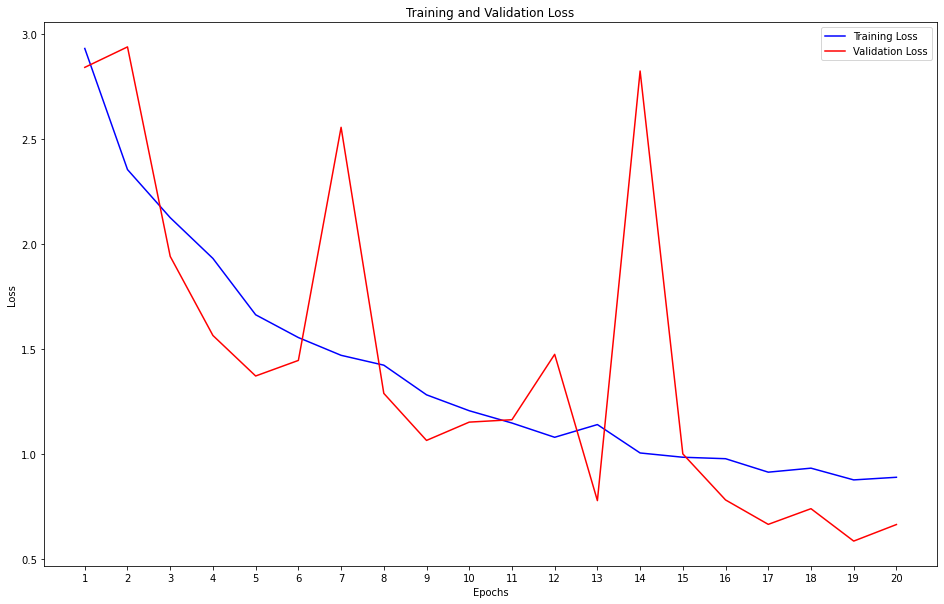

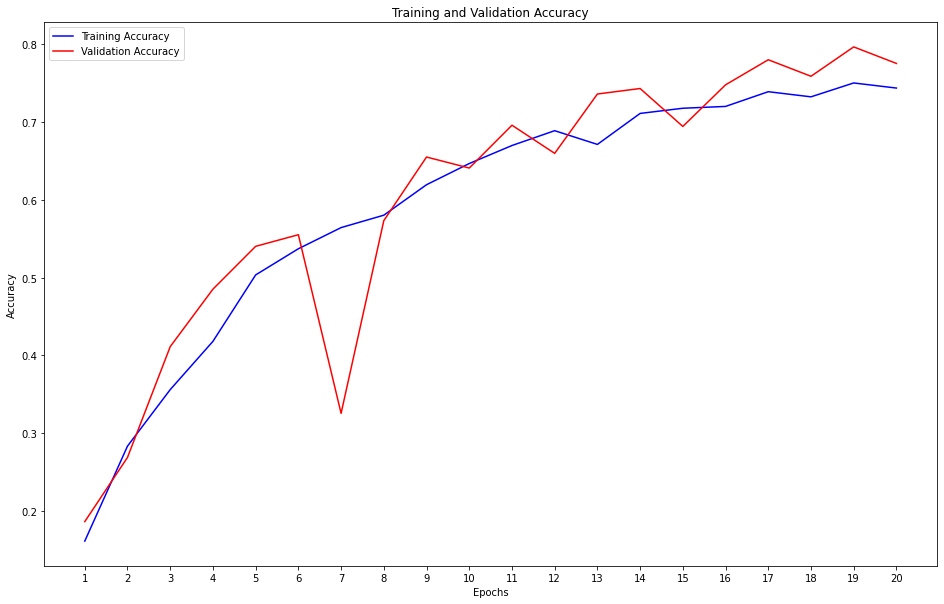

In [9]:
history_dict = history.history

loss_values = history_dict['loss']  
val_loss_values = history_dict['val_loss']

#Plotting loss & accuracy of training and validation datasets
epochs = range(1, len(loss_values)+1) 
# code to plot the results
plt.plot(epochs, loss_values, 'b', label="Training Loss")
plt.plot(epochs, val_loss_values, 'r', label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Loss")
plt.legend()
plt.show()


history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'b', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [10]:
class_labels = test_generator_aug.class_indices
class_labels = {v:k for k,v in class_labels.items()}
classes = list(class_labels.values())
y_pred = model.predict_generator(test_generator_aug, len(test_generator_aug))
y_pred = np.argmax(y_pred,axis=1)
cnf_matrix = confusion_matrix(test_generator_aug.classes,y_pred)
target_names = list(class_labels.values())
print(cnf_matrix)

Instructions for updating:
Please use Model.predict, which supports generators.
[[28  0  0  0  0  0  0  0  0 15  0  0  0  2  1  1  0  0  1  0  0  0  0  0
   0]
 [ 0 48  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
   0]
 [ 0  0 47  0  0  0  0  0  0  1  0  0  0  0  2  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0 40  1  0  0  0  0  6  0  2  0  0  0  0  2  0  0  0  0  0  4
   0]
 [ 0  1  0  0 50  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  2
   1]
 [ 0  0  0  0  1 46  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  1  0 48  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  3 38  0  1  0  0  0  0  0  0  3  2  0  0  2  0  0  0
   0]
 [ 0  0  0  0  0  0  1  4 42  1  1  0  0  0  0  0  0  0  0  0  1  0  0  0
   0]
 [ 0  0  0  0  0  1  0  0  0 45  0  0  1  1  1  0  0  1  0  0  0  0  0  0
   0]
 [ 0  1  0  0 30  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  1  0  0  2  1 46  0

                          precision    recall  f1-score   support

  abraham_grampa_simpson       0.97      0.58      0.73        48
  apu_nahasapeemapetilon       0.92      0.96      0.94        50
            bart_simpson       0.89      0.94      0.91        50
             black widow       0.00      0.00      0.00        55
         captain america       0.27      0.88      0.42        57
charles_montgomery_burns       0.78      0.96      0.86        48
            chief_wiggum       0.77      0.96      0.86        50
          comic_book_guy       0.76      0.78      0.77        49
          edna_krabappel       1.00      0.84      0.91        50
           homer_simpson       0.64      0.90      0.75        50
                    hulk       0.58      0.45      0.51        56
           kent_brockman       0.96      0.92      0.94        50
        krusty_the_clown       0.91      1.00      0.95        50
           lenny_leonard       0.90      0.90      0.90        50
         

C:\Users\Nishant\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


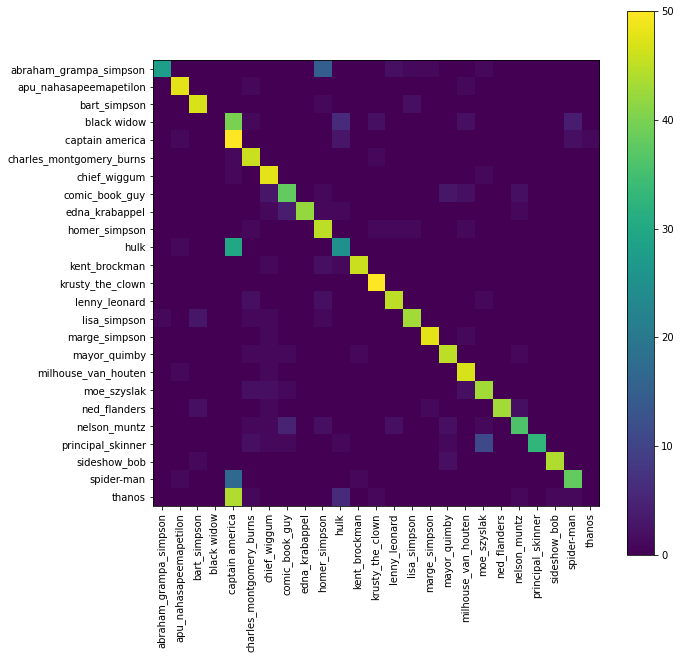

In [11]:
target_names = list(class_labels.values())
print(classification_report(test_generator_aug.classes,y_pred,target_names=target_names))
plt.figure(figsize=(10,10))
plt.imshow(cnf_matrix, interpolation= 'nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks,classes, rotation=90)
_ = plt.yticks(tick_marks,classes)

# Inception

In [30]:
# example of loading the inception v3 model
from keras.applications.inception_v3 import InceptionV3
# load model
base_model = InceptionV3(input_shape = (175, 175, 3), include_top = False, weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False
    


x = keras.layers.Flatten()(base_model.output)
x = keras.layers.Dense(1024, activation='relu')(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Dense(25, activation='sigmoid')(x)

model = Model(base_model.input, x)    
# summarize the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 175, 175, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 87, 87, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 87, 87, 32)   96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 87, 87, 32)   0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [59]:
epochs = 20
initial_lrate = 0.001
# implement the learning rate decay function
def decay(epoch, steps=100):
    initial_lrate = 0.01
    drop = 0.96
    epochs_drop = 8
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate
lr_schedule = LearningRateScheduler(decay, verbose=1)
sgd = SGD(lr=initial_lrate, momentum=0.9, nesterov=False)
model.compile(loss=['categorical_crossentropy'], loss_weights=[0.3], optimizer='adam', metrics=['accuracy'])

# train the model
hist = model.fit_generator(train_generator_aug,steps_per_epoch = len(train_generator_aug)//8,
                             epochs = 20,
                             validation_data = validation_generator_aug,
                             validation_steps = len(validation_generator_aug)//8,callbacks=[lr_schedule])

Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.01.
165/165 [==============================] - 342s 2s/step - loss: 3.9984 - accuracy: 0.0466 - val_loss: 4.0068 - val_accuracy: 0.0188
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.01.
165/165 [==============================] - 316s 2s/step - loss: 4.0788 - accuracy: 0.0436 - val_loss: 3.7305 - val_accuracy: 0.0500
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.01.
165/165 [==============================] - 302s 2s/step - loss: 4.0051 - accuracy: 0.0489 - val_loss: 4.5592 - val_accuracy: 0.0437
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.01.
165/165 [==============================] - 307s 2s/step - loss: 4.0235 - accuracy: 0.0473 - val_loss: 4.0068 - val_accuracy: 0.0250
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.01.
165/165 [==============================] - 302s 2s/step - loss: 4.0737 - accuracy:

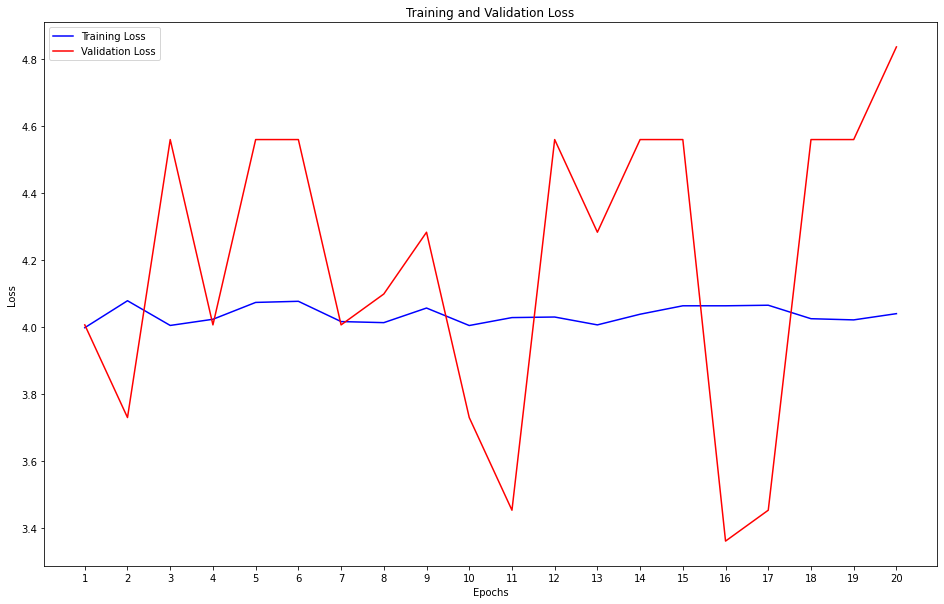

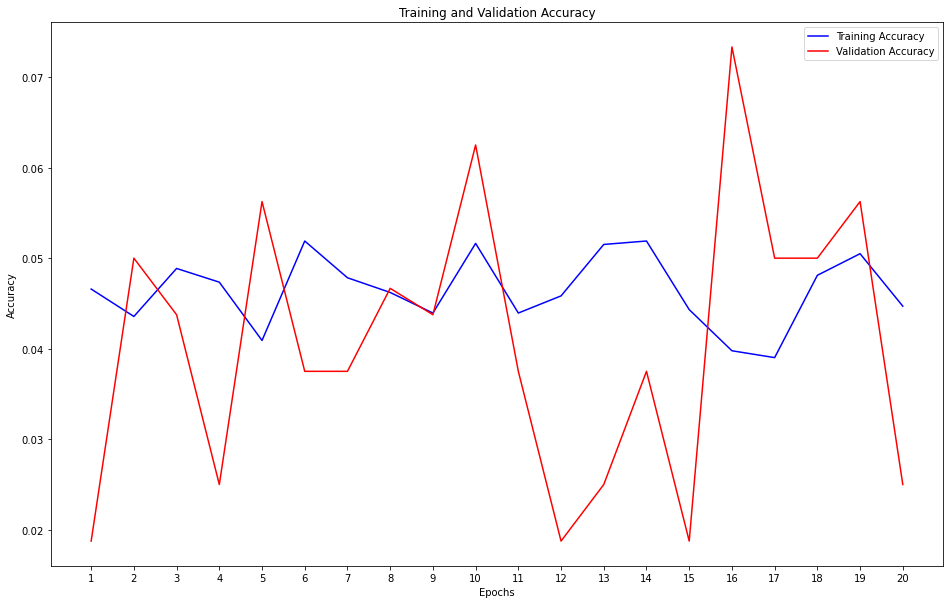

In [64]:
history_dict = hist.history

loss_values = history_dict['loss']  
val_loss_values = history_dict['val_loss']

#Plotting loss & accuracy of training and validation datasets
epochs = range(1, len(loss_values)+1) 
# code to plot the results
plt.plot(epochs, loss_values, 'b', label="Training Loss")
plt.plot(epochs, val_loss_values, 'r', label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Loss")
plt.legend()
plt.show()


history_dict = hist.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'b', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [65]:
class_labels = test_generator_aug.class_indices
class_labels = {v:k for k,v in class_labels.items()}
classes = list(class_labels.values())
y_pred = model.predict_generator(test_generator_aug, len(test_generator_aug))
y_pred = np.argmax(y_pred,axis=1)
cnf_matrix = confusion_matrix(test_generator_aug.classes,y_pred)
target_names = list(class_labels.values())
print(cnf_matrix)

[[ 0  0  0  0  0  0 48  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0 50  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0 50  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0 55  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0 57  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0 48  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0 50  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0 49  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0 50  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0 50  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0 56  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0 50  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0 50  0  0  0  0  0  0

E:\Softwares\Ana\envs\keras\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Ana\envs\keras\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Ana\envs\keras\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                          precision    recall  f1-score   support

  abraham_grampa_simpson       0.00      0.00      0.00        48
  apu_nahasapeemapetilon       0.00      0.00      0.00        50
            bart_simpson       0.00      0.00      0.00        50
             black widow       0.00      0.00      0.00        55
         captain america       0.00      0.00      0.00        57
charles_montgomery_burns       0.00      0.00      0.00        48
            chief_wiggum       0.04      1.00      0.08        50
          comic_book_guy       0.00      0.00      0.00        49
          edna_krabappel       0.00      0.00      0.00        50
           homer_simpson       0.00      0.00      0.00        50
                    hulk       0.00      0.00      0.00        56
           kent_brockman       0.00      0.00      0.00        50
        krusty_the_clown       0.00      0.00      0.00        50
           lenny_leonard       0.00      0.00      0.00        50
         

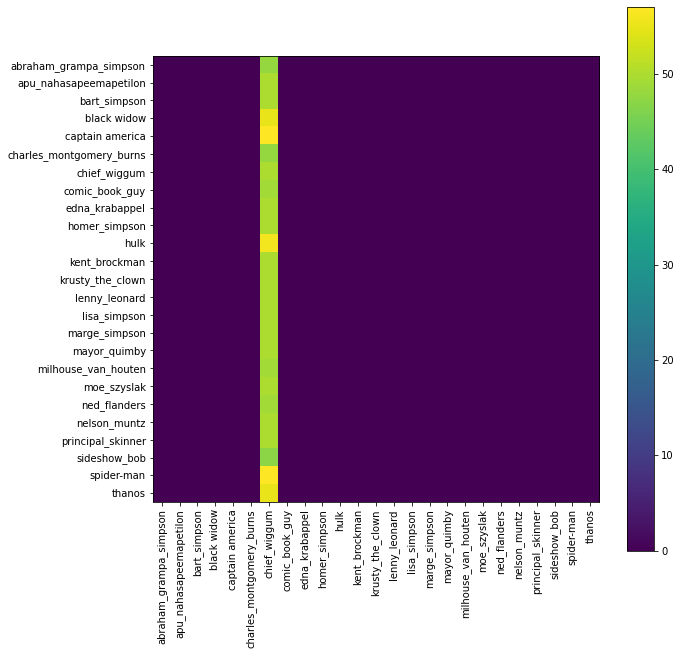

In [66]:
target_names = list(class_labels.values())
print(classification_report(test_generator_aug.classes,y_pred,target_names=target_names))
plt.figure(figsize=(10,10))
plt.imshow(cnf_matrix, interpolation= 'nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks,classes, rotation=90)
_ = plt.yticks(tick_marks,classes)

# RESNET

In [30]:
from keras.applications.resnet50 import ResNet50

In [66]:
base_model = ResNet50(input_shape=(175, 175,3), include_top=False, weights="imagenet")

E:\Softwares\Ana\envs\keras\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [73]:
for layer in base_model.layers:
    layer.trainable = False
    
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(1024,activation=('relu'),input_dim=512))
model.add(Dense(512,activation=('relu'))) 
model.add(Dense(256,activation=('relu'))) 
#model.add(Dropout(.2))
model.add(Dense(25,activation=('softmax'))) 

#Checking the final model summary
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 6, 6, 2048)        23587712  
_________________________________________________________________
flatten_3 (Flatten)          (None, 73728)             0         
_________________________________________________________________
dense_25 (Dense)             (None, 1024)              75498496  
_________________________________________________________________
dense_26 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_27 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_28 (Dense)             (None, 25)                6425      
Total params: 99,748,761
Trainable params: 76,161,049
Non-trainable params: 23,587,712
_________________________________

In [74]:
model.compile(optimizer = SGD(lr=0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [76]:
history = model.fit_generator(train_generator_aug,steps_per_epoch =4,
                             epochs = 10,
                             validation_data = validation_generator_aug,
                             validation_steps = 2)

Epoch 1/10
4/4 [==============================] - 20s 5s/step - loss: 3.7602 - accuracy: 0.0156 - val_loss: 4.1204 - val_accuracy: 0.0312
Epoch 2/10
4/4 [==============================] - 20s 5s/step - loss: 3.7441 - accuracy: 0.0469 - val_loss: 3.7685 - val_accuracy: 0.0312
Epoch 3/10
4/4 [==============================] - 19s 5s/step - loss: 4.0871 - accuracy: 0.0000e+00 - val_loss: 3.7161 - val_accuracy: 0.0938
Epoch 4/10
4/4 [==============================] - 21s 5s/step - loss: 3.7861 - accuracy: 0.0625 - val_loss: 3.2278 - val_accuracy: 0.0938
Epoch 5/10
4/4 [==============================] - 19s 5s/step - loss: 3.6866 - accuracy: 0.0312 - val_loss: 4.2139 - val_accuracy: 0.0625
Epoch 6/10
4/4 [==============================] - 20s 5s/step - loss: 3.5916 - accuracy: 0.0312 - val_loss: 4.1085 - val_accuracy: 0.0000e+00
Epoch 7/10
4/4 [==============================] - 20s 5s/step - loss: 3.4799 - accuracy: 0.0781 - val_loss: 3.9283 - val_accuracy: 0.0000e+00
Epoch 8/10
4/4 [======

# Predictions

In [8]:
model = load_model('C:\\access\\data analytics\\Sem4\\Capstone\\simpsons\\vgg.h5')

In [12]:
def draw_test(name, pred, im, true_label):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(im, 160, 0, 0, 500 ,cv2.BORDER_CONSTANT,value=BLACK)
    cv2.putText(expanded_image, "predited - "+ pred, (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
    cv2.putText(expanded_image, "true - "+ true_label, (20, 120) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,255,0), 2)
    cv2.imshow(name, expanded_image)


def getRandomImage(path, img_width, img_height):
    """function loads a random images from a random folder in our test path """
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0,len(folders))
    path_class = folders[random_directory]
    file_path = path + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    random_file_index = np.random.randint(0,len(file_names))
    image_name = file_names[random_file_index]
    final_path = file_path + "/" + image_name
    return image.load_img(final_path, target_size = (img_width, img_height)), final_path, path_class

# dimensions of our images
img_width, img_height = 32, 32


files = []
predictions = []
true_labels = []
# predicting images
for i in range(0, 10):
    path = 'C:\\access\\data analytics\\Sem4\\Capstone\\simpsons\\test\\' 
    img, final_path, true_label = getRandomImage(path, img_width, img_height)
    files.append(final_path)
    true_labels.append(true_label)
    x = image.img_to_array(img)
    x = x * 1./255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size = 10)
    classes = np.argmax(classes,axis=1)
    predictions.append(classes)
    
for i in range(0, len(files)):
    image = cv2.imread((files[i]))
    draw_test("Prediction", class_labels[predictions[i][0]], image, true_labels[i])
    cv2.waitKey(0)

cv2.destroyAllWindows()

# Graphical Interface

In [13]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy

#load the trained model to classify the images

from keras.models import load_model
model = load_model('C:\\access\\data analytics\\Sem4\\Capstone\\simpsons\\vgg.h5')

#dictionary to label all the CIFAR-10 dataset classes.

classes = { 
    0: 'abraham_grampa_simpson',
    1: 'apu_nahasapeemapetilon',
    2: 'bart_simpson',
    3: 'black widow',
    4: 'captain america',
    5: 'charles_montgomery_burns',
    6: 'chief_wiggum',
    7: 'comic_book_guy',
    8: 'edna_krabappel',
    9: 'homer_simpson',
    10: 'hulk',
    11: 'kent_brockman',
    12: 'krusty_the_clown',
    13: 'lenny_leonard',
    14: 'lisa_simpson',
    15: 'marge_simpson',
    16: 'mayor_quimby',
    17: 'milhouse_van_houten',
    18: 'moe_szyslak',
    19: 'ned_flanders',
    20: 'nelson_muntz',
    21: 'principal_skinner',
    22: 'sideshow_bob',
    23: 'spider-man',
    24: 'thanos'
}
#initialise GUI

top=tk.Tk()
top.geometry('800x600')
top.title('Simpsons And Marvel')
top.configure(background='#CDCDCD')
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)

def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((32,32))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    pred = model.predict_classes([image])[0]
    sign = classes[pred]
    print(sign)
    label.configure(foreground='#011638', text=sign) 

    
def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",
   command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',
font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)

def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),
    (top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass

upload=Button(top,text="Upload an image",command=upload_image,
  padx=10,pady=5)

upload.configure(background='#364156', foreground='white',
    font=('arial',10,'bold'))

upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Simpons And Marvel",pady=20, font=('arial',20,'bold'))

heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
spider-man
